In [1]:
### This is a gene specific analysis notebook
from candidate_utils import *

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
# Gene-transcript dict
dict_name = pickle.load(open(os.path.join(dir_refs,'dict_name_forcov_062121.pkl'), 'rb'))

In [4]:
gene_name = 'AKAP2'

In [5]:
# Find transcript for the gene
for transcript,gene in dict_name.items():
    if gene == gene_name:
        print(transcript)

ENST00000555236


<span style="color:blue">**The histology subtypes of patients with the mutation**</span>.


In [6]:
df_str, df_num = get_num_str(gene_name)

/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1,17,24,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


In [7]:
df_str

,dcc_specimen_type,histology_tier3,histology_tier4,tumour_histological_type,tumour_stage,tumour_histological_comment,specimen_donor_treatment_type
syn,{'Primary tumour - solid tissue': 3},{'Squamous cell carcinoma': 3},{'Squamous cell carcinoma': 3},"{'Squamous cell carcinoma, NOS': 3}",{nan: 3},{nan: 3},{nan: 3}
all,{'Primary tumour - solid tissue': 56},{'Squamous cell carcinoma': 56},{'Squamous cell carcinoma': 56},"{'Squamous cell carcinoma, NOS': 56}","{nan: 43, 'pT4aN2bM0': 5, 'pT4aN0M0': 4, 'pT4a...",{nan: 56},"{nan: 43, 'no treatment': 13}"


In [8]:
df_num

SV.events  Coding.SNVs  Non.coding.SNVs  \
mut_status                                                    
syn        count     6.000000     6.000000         6.000000   
           mean     84.333333  1615.500000    212489.666667   
           std      88.991385  1293.003751    158158.019245   
           min      30.000000   542.000000     70331.000000   
           25%      40.250000   600.500000     79879.000000   
           50%      56.500000  1070.000000    166630.000000   
           75%      62.250000  2626.250000    332539.000000   
           max     264.000000  3422.000000    432543.000000   
all        count   106.000000   107.000000       107.000000   
           mean    182.490566   803.971963    112468.271028   
           std     213.635080  1008.382232    144315.255781   
           min      12.000000    20.000000      2126.000000   
           25%      49.250000   121.500000     17297.000000   
           50%      98.000000   496.000000     70331.000000   
           75%     242.750000   932.500000    138316.500000   
           max    1234.000000  5164.000000    854014.000000   

                  CNA.events..do_not_use.  Retrotransposon.insertions  \
mut_status                                                              
syn        count                 6.000000                    6.000000   
           mean                275.333333                    0.666667   
           std                 206.418668                    1.211060   
           min                 157.000000                    0.000000   
           25%                 179.000000                    0.000000   
           50%                 206.500000                    0.000000   
           75%                 215.250000                    0.750000   
           max                 694.000000                    3.000000   
all        count               107.000000                  107.000000   
           mean                487.065421                    4.990654   
           std                 461.390500                   34.356756   
           min                 118.000000                    0.000000   
           25%                 202.000000                    0.000000   
           50%                 317.000000                    0.000000   
           75%                 636.000000                    2.000000   
           max                3128.000000                  355.000000   

                  Mitochondrial.mutations    all.Indels  
mut_status                                               
syn        count                 6.000000      6.000000  
           mean                  2.666667   1283.000000  
           std                   2.422120    936.930520  
           min                   0.000000    431.000000  
           25%                   1.000000    615.500000  
           50%                   2.000000    909.500000  
           75%                   4.500000   1875.500000  
           max                   6.000000   2733.000000  
all        count               107.000000    107.000000  
           mean                  2.168224   1000.140187  
           std                   1.840252   2274.979637  
           min                   0.000000     79.000000  
           25%                   1.000000    401.000000  
           50%                   2.000000    556.000000  
           75%                   3.000000    900.000000  
           max                   8.000000  22963.000000

<span style="color:blue">**Mutation**</span>.


In [8]:
df_all, df_mut, donor_list = get_mut(gene_name)

/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3263: DtypeWarning: Columns (1,17,24,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Total 56 patients
3 patients have synonymous mutations, they are: ['DO14814', 'DO15398', 'DO14250']
9:g.112898859C>T
9:g.112899838C>A
9:g.112898559T>G
9:g.112899252G>T


In [12]:
df_all.loc[pd.IndexSlice[gene_name, :,donor_list],'Genome_Change']

Hugo_Symbol  Variant_Classification  Donor_ID
AKAP2        Silent                  DO14814     g.chr9:112898859C>T
             IGR                     DO14814     g.chr9:112933435G>C
             Silent                  DO15398     g.chr9:112899838C>A
             5'Flank                 DO14250     g.chr9:112887345C>A
             Silent                  DO14250     g.chr9:112898559T>G
                                     DO14250     g.chr9:112899252G>T
             Intron                  DO14250     g.chr9:112927298T>C
Name: Genome_Change, dtype: object

<span style="color:blue">**CNV**</span>.


In [10]:
cnv = get_cnv(donor_list, gene_name)

                               08227616-02a5-46e8-9db1-f2d1d691ab23
Gene Symbol Locus ID Cytoband                                      
AKAP2       11217    9q31.3                                     3.0
                               190eb791-383d-4e27-870d-e470630843e7
Gene Symbol Locus ID Cytoband                                      
AKAP2       11217    9q31.3                                     4.0
                               3e604a1c-b95f-44ff-9723-e2fac845da3b
Gene Symbol Locus ID Cytoband                                      
AKAP2       11217    9q31.3                                     2.0


<span style="color:blue">**Expression PCAWG**</span>.


/opt/aci/sw/anaconda3/2020.07_gcc-4.8.5-bzb/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (1,17,24,33,34,35,36) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Number of normal patient: 2
Number of synonymous patients: 3
Number of other tumor patients:40
test statistic:58.0,p-value:0.4715


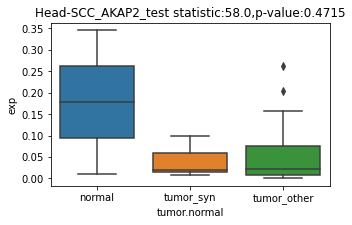

In [11]:
get_expression(gene_name)

<span style="color:blue">**CRISPR**</span>.


In [16]:
get_lineage(gene_name, 'Upper Aerodigestive')

['Upper Aerodigestive Squamous' 'Upper Aerodigestive Carcinoma' nan]


58 in histology subtype
931 not in histology subtype
test statistic:23996.0,    p-value:0.0774


KeyError: 'Expression'

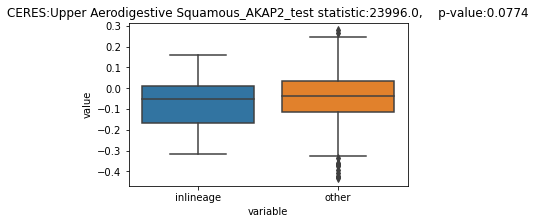

In [20]:
def get_CERES(gene, lineage):
    dir_depmap = './depmap'
    df_depmap = pd.read_csv(os.path.join(dir_depmap, gene+'_21Q2.csv'))
    df_depmap.columns = ['ID', 'CERES', 'Name', 'Primary Disease', 'Lineage', 'Lineage Subtype', 'Mutation']

    df_gene = df_depmap[df_depmap['Lineage Subtype'] == lineage]
    print(f'{len(df_gene)} in histology subtype')
    df_other = df_depmap[df_depmap['Lineage Subtype'] != lineage]
    print(f'{len(df_other)} not in histology subtype')
    df_all = pd.DataFrame({'inlineage':df_gene['CERES'],
                          'other':df_other['CERES']})
    df_all = df_all.melt()

    fig,ax = plt.subplots(figsize=(5,3))
    ax = sns.boxplot(x = 'variable', y = 'value', data = df_all)

    mannwhitneyu(df_gene['CERES'], df_other['CERES'])
    text = f'test statistic:{round(mannwhitneyu(df_gene["CERES"], df_other["CERES"])[0],4)},\
    p-value:{round(mannwhitneyu(df_gene["CERES"], df_other["CERES"])[1],4)}'
    print(text)
    ax.set_title('CERES:'+lineage+'_'+gene+'_'+text)
    
    # Expression
    df_all_exp = pd.DataFrame({'inlineage':df_gene['Expression'],
                      'other':df_other['Expression']})
    df_all_exp = df_all_exp.melt()
    fig,ax = plt.subplots(figsize=(5,3))
    ax = sns.boxplot(x = 'variable', y = 'value', data = df_all_exp)

    mannwhitneyu(df_gene['Expression'], df_other['Expression'])
    text = f'test statistic:{round(mannwhitneyu(df_gene["Expression"], df_other["Expression"])[0],4)},\
    p-value:{round(mannwhitneyu(df_gene["Expression"], df_other["Expression"])[1],4)}'
    print(text)
    ax.set_title('DepMap Expression:'+lineage+'_'+gene+'_'+text)
get_CERES(gene_name, 'Upper Aerodigestive Squamous')

<span style="color:blue">**Alternative Splicing**</span>  

In [21]:
dir_splice = '../../anno_ref/ICGC/alternative_splicing'
exp_dir = '../../anno_ref/ICGC/pcawg_rnaseq/'
# Read aliquot id information
df_exp_info = pd.read_csv(os.path.join(exp_dir,'rnaseq.metadata.tsv'), sep = '\t')

In [16]:
### If patient is in the splicing file(transcriptome analysis info)
for donor in donor_list:
    tumor_id = df_exp_info[df_exp_info['icgc_donor_id'] == donor]['aliquot_id']
    if len(tumor_id) ==0:
        print(f'{donor} is not in PCAWG transcriptome analysis')

DO50345 is not in PCAWG transcriptome analysis
DO50326 is not in PCAWG transcriptome analysis
DO50387 is not in PCAWG transcriptome analysis
DO50401 is not in PCAWG transcriptome analysis
DO50337 is not in PCAWG transcriptome analysis
